In [8]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

image_size = 224

mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

normalize = transforms.Normalize(mean=mean, std=std)

val_transform = transforms.Compose(
    [
        transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        normalize,
    ]
)

dataset = datasets.ImageNet(
    root='/BS/dduka/work/data/imagenet1k/', 
    split='val', 
    transform=val_transform,
)

print(len(dataset))

50000


In [12]:
print(f"Classes: {dataset.classes}")

Classes: [('tench', 'Tinca tinca'), ('goldfish', 'Carassius auratus'), ('great white shark', 'white shark', 'man-eater', 'man-eating shark', 'Carcharodon carcharias'), ('tiger shark', 'Galeocerdo cuvieri'), ('hammerhead', 'hammerhead shark'), ('electric ray', 'crampfish', 'numbfish', 'torpedo'), ('stingray',), ('cock',), ('hen',), ('ostrich', 'Struthio camelus'), ('brambling', 'Fringilla montifringilla'), ('goldfinch', 'Carduelis carduelis'), ('house finch', 'linnet', 'Carpodacus mexicanus'), ('junco', 'snowbird'), ('indigo bunting', 'indigo finch', 'indigo bird', 'Passerina cyanea'), ('robin', 'American robin', 'Turdus migratorius'), ('bulbul',), ('jay',), ('magpie',), ('chickadee',), ('water ouzel', 'dipper'), ('kite',), ('bald eagle', 'American eagle', 'Haliaeetus leucocephalus'), ('vulture',), ('great grey owl', 'great gray owl', 'Strix nebulosa'), ('European fire salamander', 'Salamandra salamandra'), ('common newt', 'Triturus vulgaris'), ('eft',), ('spotted salamander', 'Ambystom

In [10]:
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=1, shuffle=False, num_workers=1, pin_memory=True
)

In [11]:
for batch in dataloader:
    print(batch)
    break

[tensor([[[[ 1.4612,  1.1015,  1.7180,  ...,  0.8447,  0.4679,  0.5364],
          [ 1.7009,  0.5707,  1.0502,  ...,  0.2111,  0.6049,  0.8618],
          [ 1.2899,  0.3138,  0.4851,  ...,  0.5193,  0.8789,  0.8961],
          ...,
          [-0.2684, -0.2856, -0.3027,  ...,  0.2624,  0.4679,  0.5022],
          [-0.3541, -0.3198, -0.2171,  ...,  1.0502,  0.3652, -0.1999],
          [-0.3712, -0.3541, -0.1314,  ...,  0.2282, -0.1657, -0.1143]],

         [[ 1.1856,  0.7829,  1.1506,  ...,  1.2031,  0.7654,  0.8529],
          [ 1.3256,  0.2227,  0.6078,  ...,  0.6078,  0.8529,  1.1506],
          [ 0.7479, -0.0749,  0.1877,  ...,  0.8704,  1.1681,  1.2206],
          ...,
          [-0.0049, -0.0749, -0.1099,  ...,  0.7304,  1.2206,  0.8704],
          [ 0.1527,  0.1527,  0.3627,  ...,  1.5357,  0.7654, -0.0924],
          [ 0.1176,  0.0826,  0.6954,  ...,  0.3452,  0.0826,  0.1702]],

         [[ 0.5311,  0.3742,  0.1302,  ...,  0.9842,  0.6879,  0.9319],
          [ 0.4614,  0.0256, 

 47%|████▋     | 12473/26716 [00:04<00:05, 2644.63it/s]

the books were turned into series


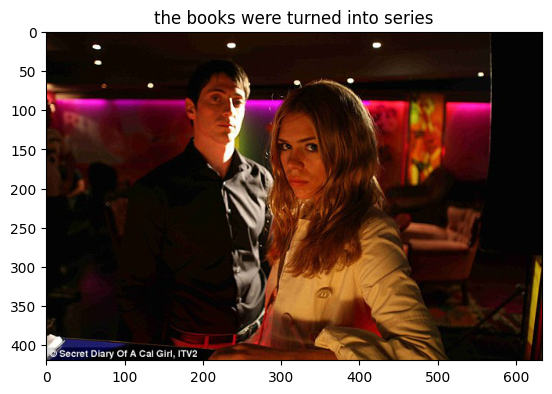

 85%|████████▌ | 22835/26716 [00:08<00:01, 2783.66it/s]

everywhere in the name of industry


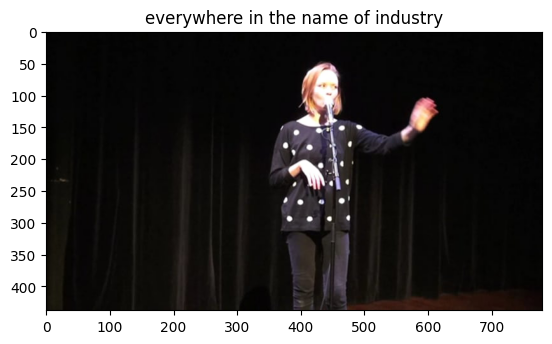

100%|██████████| 26716/26716 [00:09<00:00, 2788.07it/s]


In [ ]:
import os
import torch
import pickle
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

extracted_cc3m_val_dir = "/BS/dduka/work/databases/cc3m/validation/extracted"

keys = ["the books were turned into series", "everywhere in the name of industry", "football coach is encouraging his team to step forward and help the community in the aftermath"]

# Iterate over all .pyd files in the directory
for file in tqdm(os.listdir(extracted_cc3m_val_dir)):
    if file.endswith(".pyd"):
        caption_path = os.path.join(extracted_cc3m_val_dir, file)
        caption = pickle.load(open(caption_path, "rb"))["caption"]

        if any(key.lower() in caption.lower() for key in keys):

            # Show the image
            image_path = os.path.join(extracted_cc3m_val_dir, file.replace(".metadata.pyd", ".image.pth"))
            image = torch.load(image_path, map_location="cpu", weights_only=True)
            image = Image.fromarray(image.numpy()).convert("RGB")
            
            # Plot the image
            print(caption)
            plt.imshow(image)
            plt.title(caption)
            plt.show()